<a href="https://colab.research.google.com/github/Nitish9973/Python-Project/blob/main/Project_Python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Netflix logo.jpeg to Netflix logo.jpeg


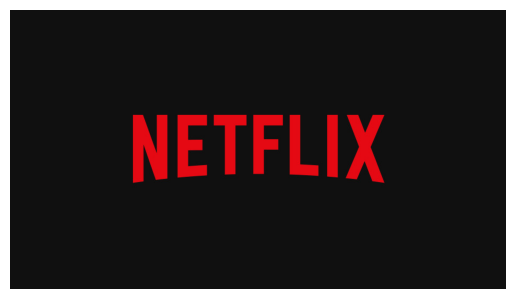

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = 'Netflix logo.jpeg'
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

Loading and Import **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",USA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,USA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

###Counting the total null values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.cast.fillna("cast unavailable", inplace=True)
df.country.fillna("production country unavailable", inplace=True)
df.director.fillna("director unavailable", inplace=True)

#**Explanation**: There are two ways we might respond to the "Country" column. First, since Netflix was founded in the USA, we might substitute "USA" for all the NaN values. As the nations for these films were not indicated in the Info, we may also substitute the NaN values with "Not Specified." We may substitute missing values for columns like "Director" and "Cast" with "No Director" and "No Cast," respectively. We can keep our Info by replacing the values in these columns rather than removing them.
#Since the absence of value counts for other categories like date added, its duration, stem, and rating is so low, we'll remove them from the information set.



In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#- - - - - - - - - - - - - -Explore Info

In [ ]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

# Explanation: The result reveals 3205 distinct values in the TV-MA Rating  category. which is the top most occured rating and the least is the UR Rating is 3.

#- - - - - - - -- - - - - - - - Info Analysis- - - - - - - - -   

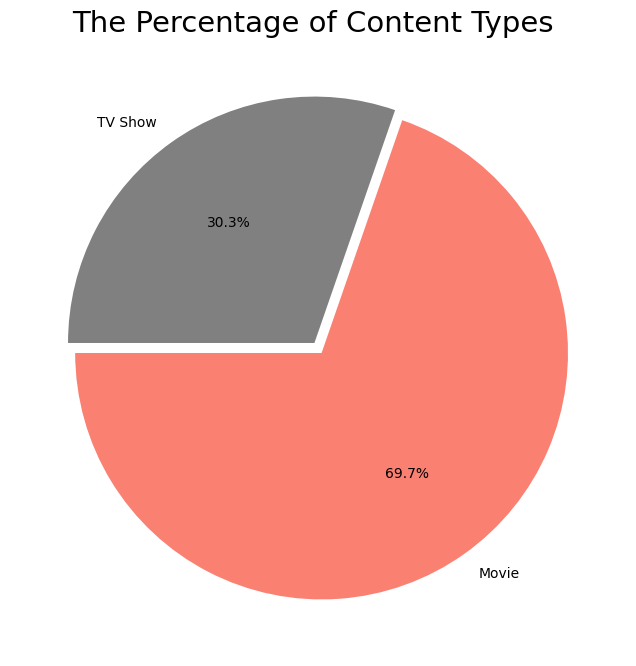

In [ ]:
plt.figure(figsize=(12,8))
plt.title("The Percentage of Content Types ", fontsize=21)
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['salmon','grey'],  autopct='%1.1f%%', startangle=180)
plt.show()

#**Explanation**: It displays how many films and television series are included in the information set. The figure demonstrates that the information set contains more films than TELEVISION programs.

**Q- Top 10 Content Producing Countries**

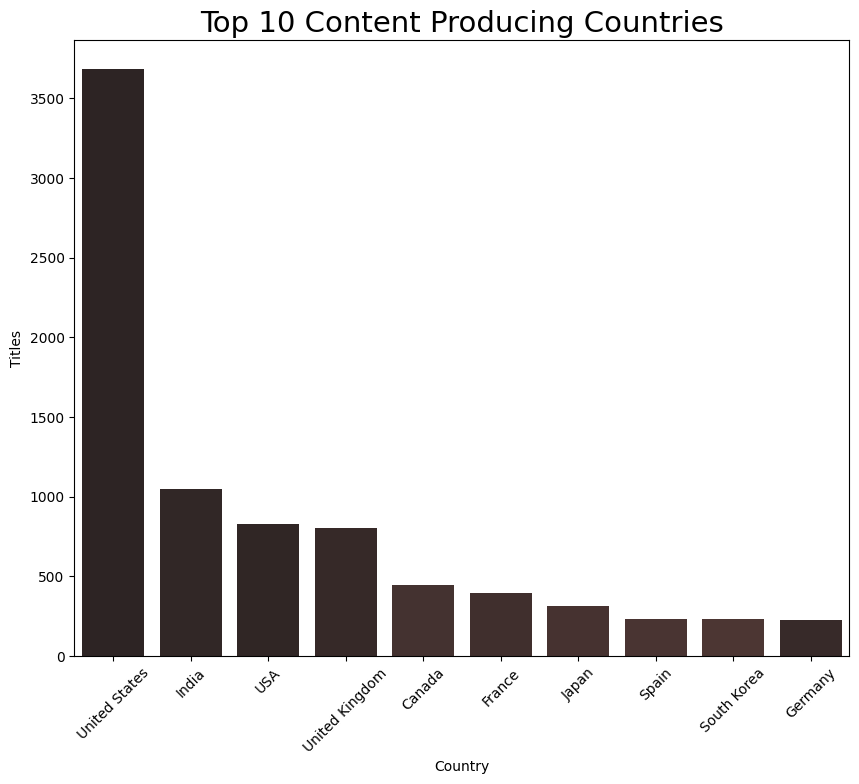

In [ ]:
Countries = df['country'].str.split(', ', expand=True).stack()
Countries = Countries[Countries != 'production country unavailable']
Countries = Countries.reset_index(drop=True)

plt.figure(figsize=(10, 8))
g = sns.countplot(x=Countries, order=Countries.value_counts().index[:10],hue=Countries, palette='dark:salmon')
plt.title('Top 10 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#**Explanation**-As we can see clearly here the top 10 content producing countries & United states is clealy leading it by very big margin followed by India. But incresing its market in India it should focus on Indian content also because US content are basically followed by educated people, but for doing good buisness people like it in regional content.

**--> Ratings of Movies & TV Show**

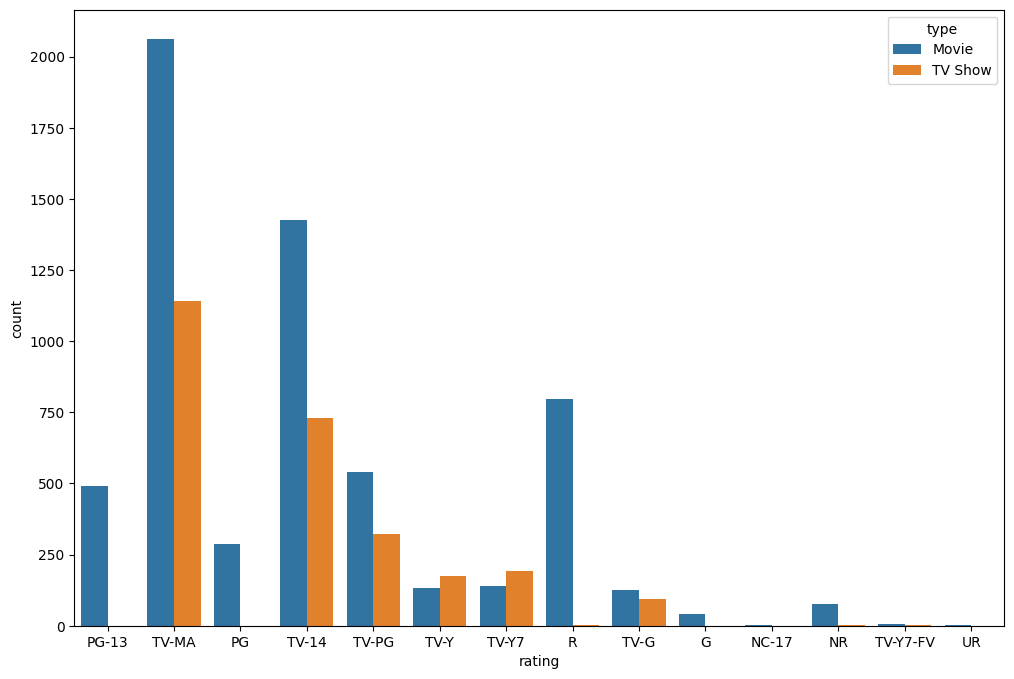

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'rating',data = df,hue = 'type')
plt.show()

#**Observation:** A count plot of the 'rating' column of the 'df' InfoFrame with the color adjusted to the 'Type' column makes up the third output. This chart displays the frequency of each distinct value in the "rating" column, split down by the kind of material (a movie or TELEVISION show, for example). We can observe how the film rating distribution and TELEVISION series vary thanks to this plot. We can observe that while the rating PG-13 is more prevalent in films than in the TELEVISION series, TELEVISION shows are more likely to receive the TELEVISION-MA classification.

# **Observation-**
the maxm no movies which are released in the year 2017 as we can we can see there is a sudden jump in the no of movies.

**Q- No of Movies Released Year by Year?**

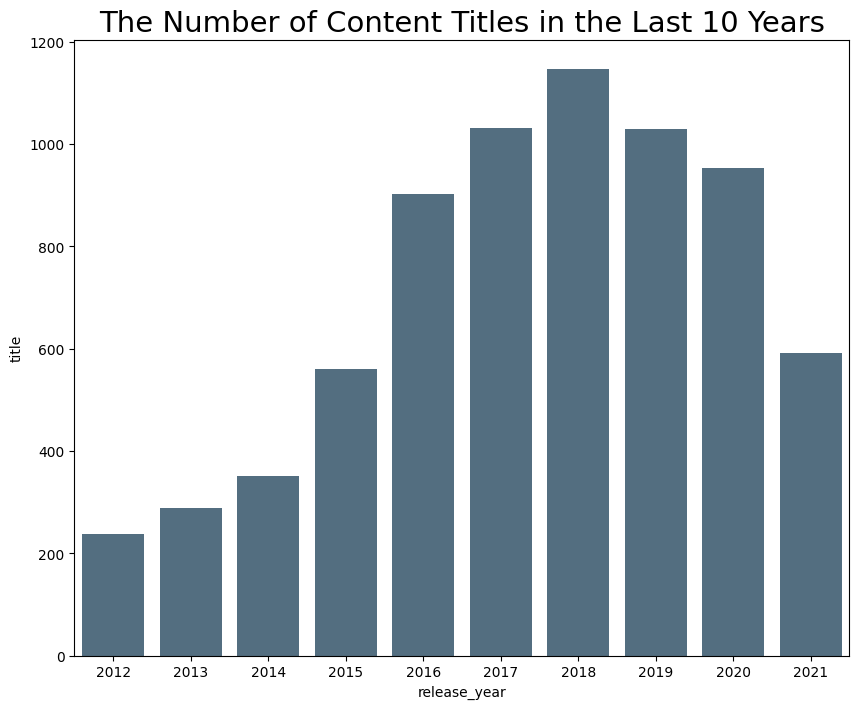

In [ ]:
plt.figure(figsize=(10,8))
netflix_year = df['release_year'].value_counts()
netflix_year = pd.DataFrame(netflix_year).reset_index()
netflix_year.columns = ['release_year','title']
sns.barplot(x = 'release_year',y = 'title', data=netflix_year.head(10), saturation=.3)
plt.title('The Number of Content Titles in the Last 10 Years', fontsize=21)
plt.show()

# **Observation-**
The number of content titles on Netflix continued to increase from 2012 to 2019.the maxm growth could be seen in year 2018.

**Q--> Top 5 Genres with the Largest Number of Content Titles**

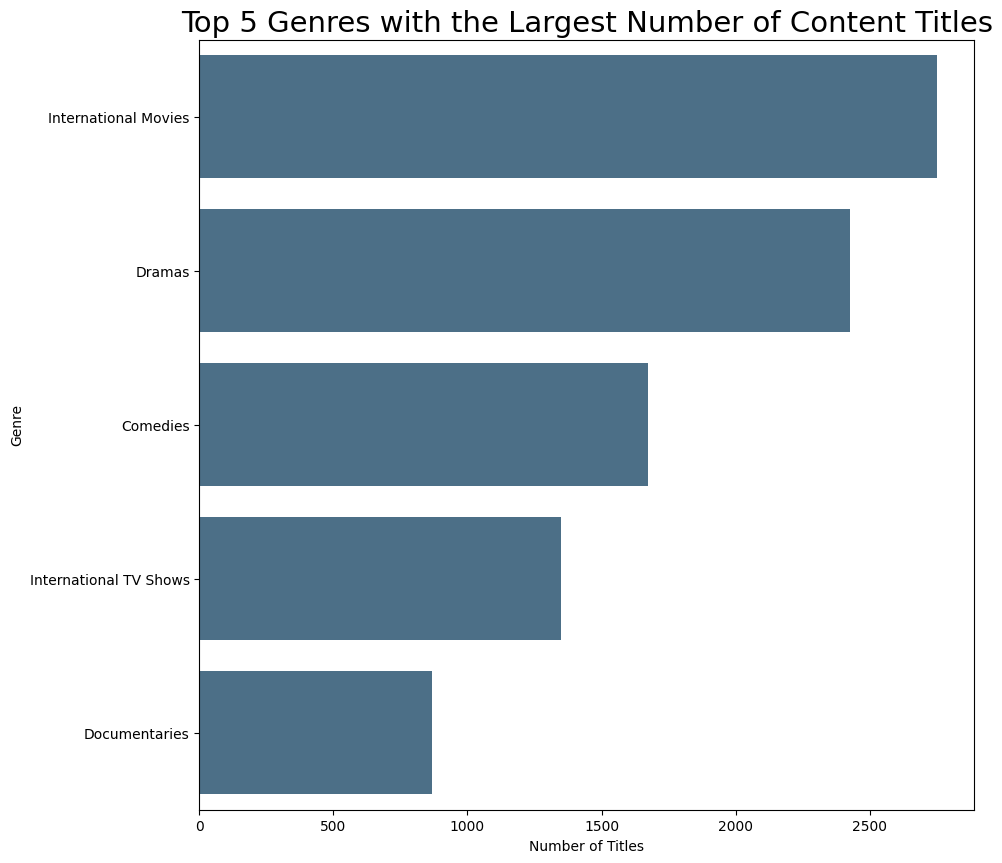

In [ ]:
# Split genres and count occurrences
top_genres_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Plot
plt.figure(figsize=(10, 10))
sns.barplot(x=top_genres_counts.head(5), y=top_genres_counts.index[:5] , saturation=0.4)
plt.title('Top 5 Genres with the Largest Number of Content Titles', fontsize=21)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

#**Explanation**
From the chart above, we can see the top 5 genres with the largest number of content titles and the first rank is International Movies with 2,500++ content titles.

Q. who are the top 5 popular actor on Netfilx ?

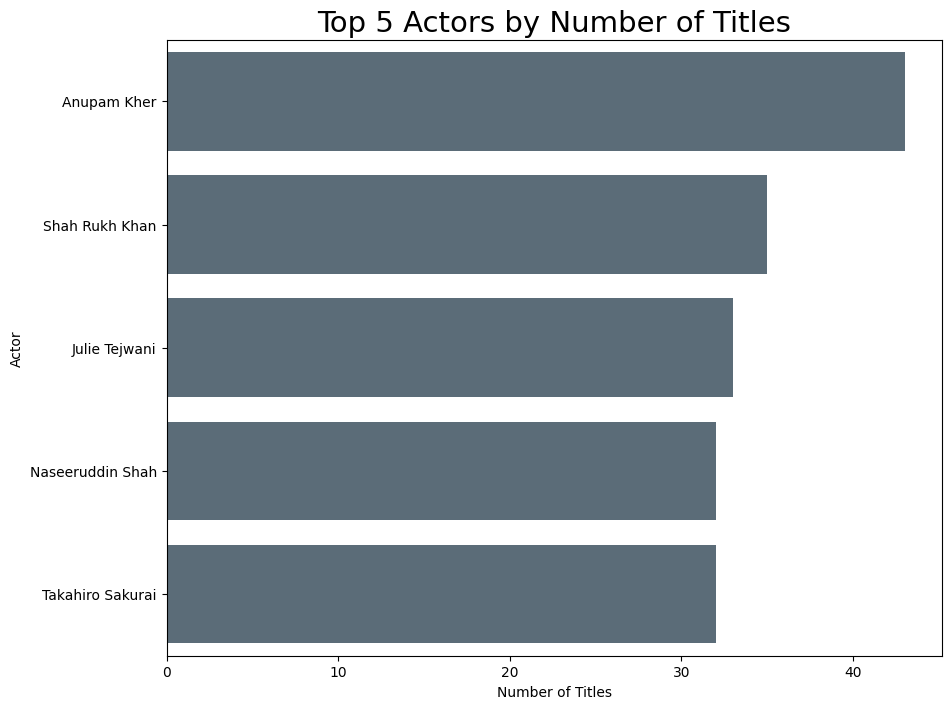

In [ ]:
netflix_cast_counts = df[df['cast'] != 'No Cast']['cast'].str.split(', ').explode().value_counts()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(y=netflix_cast_counts.index[:5], x=netflix_cast_counts.head(5), saturation=0.2)
plt.title('Top 5 Actors by Number of Titles', fontsize=21)
plt.ylabel('Actor')
plt.xlabel('Number of Titles')
plt.show()

**Top 5 Actors:** The most Famous actor on Netflix is Anupam Kher , followed by Shahrukh Khan so these are the top 5 actor on Netflix according to this Data.

**Q- Top 5 directors on Netflix?**

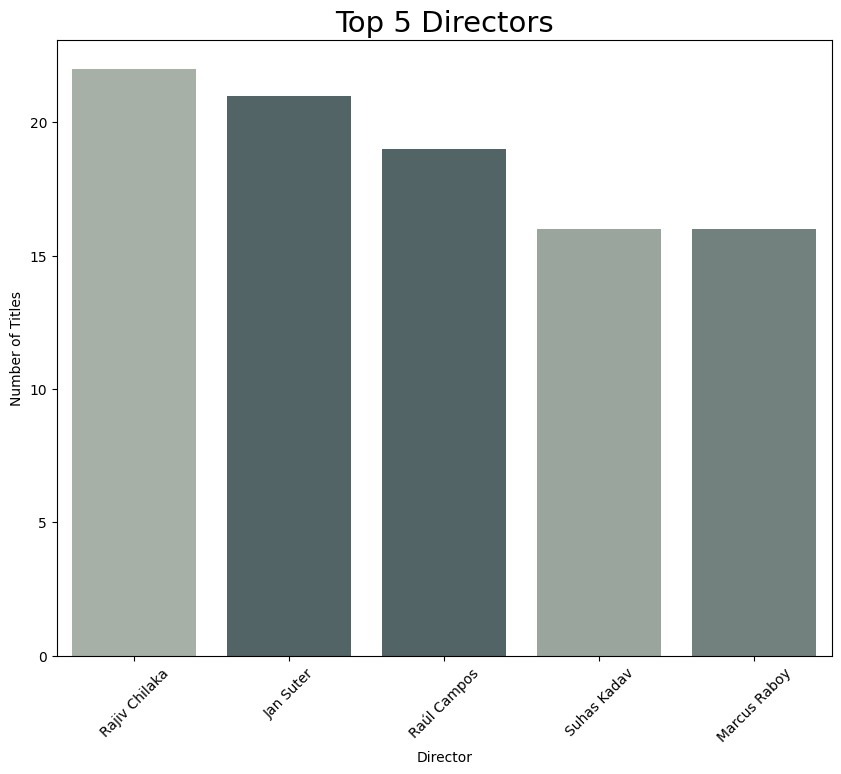

In [ ]:
# Extract directors and remove 'director unavailable'
netflix_directors = df[df.director != 'director unavailable'].director.str.split(', ', expand=True).stack()

# Plot
plt.figure(figsize=(10, 8))
sns.countplot(x=netflix_directors, order=netflix_directors.value_counts().index[:5],hue=netflix_directors, palette='crest', saturation=0.2)
plt.title('Top 5 Directors', fontsize=21)
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Top 5 Director**: The most Famous Director on Netflix is Rajiv Chilaka followed by Jan Suter, Raul Campus, Suhas Kadav, marcus Raboy. the avergae movies done by them is 15 which is more than comapare to any other director.

**Conclusions**

-->Country that produces the largest number of content titles on Netflix is the United States with 2,000++ content titles production.

-->The genre with the largest number of content titles is International Movies with 2,500++ content.

-->Rating with the largest number of Movies content is TV-MA with 2,000++ content titles and the rating with the largest number of TV Shows content is also TV-MA with 1,000++ content titles.

-->The number of content titles on Netflix continued to increase from 2012 to 2019.

-->The actor with the largest number of content titles on Netflix is Anupam kher.

-->The percentage of movies is 69.7% of the total content, while the percentage of TV shows is 30.3% of the total content.

-->The Director with the largest number of content titles on Netflix is Rajiv Chilaka who has directed 20++ number of content titles on Netflix.

**Some Insights**

--> for expanding buisness in a country like India netflix should focus more no. of content because it is next to United states & Market size is also one of the main reason.

--> if start making good Indian content people will start watchong it more.most likely all Indian content people likes to relate with reality.

---> Anupam Kher is leading Actor in this List so they can try the combination of Anupam Kher with famous director of the list which is Rajiv Chilaka.

--> Also there is a big Difference in the percentage of Movies(69.7%) & Tv Show(30.3),So they can start focusing on TV Show Content Which can be done to make content creation more Intresting. As now a days people likes to Watch TV Shows more than the Movies.

--> Also there is Sudden Drop in the content Creation After 2018 & even bigger drop in 2021 , Now a days people likes to see variety of different Show or movies so they should increase the no. of content.